# Machine Learning Stock Prediction in python

In this project we have the main obejctive i-e to predict stock market returns using machine learning (ML) techniques. Here in first part we have to engineer and build a dataset which have below features variables:
1. Moving Averages ()Technical Indicators like RSI, MACD, Stochastic_K, Accumulation and Distribution, CCI, ATR )
2. Past Volatilities including all simple vol, EWMA vol, Yang-Zhang

Here we considered different timeperiods likes 5 days, 10 days , 20 days.

In second part, we have to do prediction using below classifiers:
 Logistic, including penalised regression, Naive Bayes
 Support Vector Machines
 KNN (if possible to adapt)
 Decision Trees (Regression version) and Ensemble Methods (AdaBoost)

Also, in addition we use one of the two approaches to get proper comparision of results with tuning parameters.

 ANNs and Deep Learning (a recurrent neural network/LTSM)
 Reinforcement Learning

Then use Machine Learning to predict stock in multinomial seets class in portoflio using Black Litterman Mean Variance Optimization model.

##PART-1 : Building a dataset with all Technical Features, Volatility including all timeperiods.##

To get this I created a json file which is easy to customize based on our requirement.
Filename: stockdatainfo.json

After this I use pandas datareader function to download timeseries data of a given stock with start and end date as input.



In [45]:
import pandas as pd
import numpy as np
import import_ipynb
import seaborn as sns
from techincal_features import *
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor,kneighbors_graph
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesRegressor, ExtraTreesClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier,VotingClassifier 
import graphviz
import pydotplus
import os as os
import json
import pandas_datareader.data as web
import sympy 
import matplotlib.pylab as plt
plt.style.use('seaborn')
%matplotlib inline
from pandas.tseries import *
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
years = mdates.YearLocator()
months = mdates.MonthLocator
myFmt = mdates.DateFormatter('%Y-%m-%d')

0 JPM has data stored to csv file


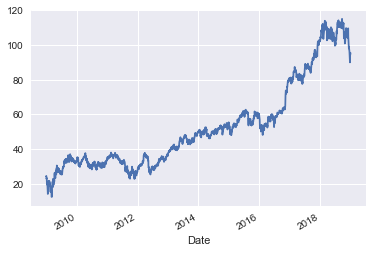

In [46]:


asset_price_plots_dir = "{}/asset_price_plots/".format(os.getcwd())
def read_jason():
    with open("stockinfo.json", 'r') as ticker_list_f:
      ticker_list_str = ticker_list_f.read()
      asset_data_info = json.loads(ticker_list_str)
    return asset_data_info
asset_data_info = read_jason()
asset_filename = "assetdata.csv"
itr = 0 
tick = asset_data_info["stock_tickers"]
feature_list = asset_data_info["features_list"]
length = len(asset_data_info['stock_tickers'])

Data = pd.DataFrame([])
for itr in range(0, length):
    ticker = tick[itr]
    data = web.DataReader(ticker, 'yahoo', "2009-01-01", "2019-01-01")[feature_list]   
    data.insert(0,'Symbol',tick[itr])
    if itr == 0:
        data.to_csv("{}".format(asset_filename), index = True, header=True)
        print (itr, tick[itr],'has data stored to csv file')
    else:
        data.to_csv("{}".format(asset_filename), index = True,mode = 'a', header=False)
        print (itr, tick[itr],'has data stored to csv file')    
    data = data[::-1]
    data['Adj Close'].plot()
    Data = Data.append(data)

# Build Technical Indicators

- Moving Average

In financial applications a simple moving average (SMA) is the unweighted mean of the previous n data. 
This ensures that variations in the mean are aligned with the variations in the data rather than being shifted in time.
An example of a simple equally weighted running mean for a n-day sample of closing price is the mean of the previous n days closing prices.
If those prices are:
     p_{M},p_{M-1} ,p_{M-(n-1)} then the formula is

\begin{aligned}{\overline {p}}_{\text{SM}}&={\frac {p_{M}+p_{M-1}+\cdots +p_{M-(n-1)}}{n}}\\&={\frac {1}{n}}\sum _{i=0}^{n-1}p_{M-i}.\end{aligned}

- Exponential Moving Average

An exponential moving average (EMA), also known as an exponentially weighted moving average (EWMA),[5] is a first-order infinite impulse response filter that applies weighting factors which decrease exponentially. The weighting for each older datum decreases exponentially, never reaching zero.

The EMA for a series Y may be calculated recursively:

S_{t}=\begin{cases}Y_{1},&t=1\\\alpha \cdot Y_{t}+(1-\alpha )\cdot S_{t-1},&t>1\end{cases}
Where:

The coefficient α represents the degree of weighting decrease, a constant smoothing factor between 0 and 1. A higher α discounts older observations faster.
Yt is the value at a time period t.
St is the value of the EMA at any time period t.

- Relative Strength Index(RSI)

RSI is a momentum oscillator that measures the speed and change of price movements. The RSI oscillates between zero and 100. Traditionally the RSI is considered overbought when above 70 and oversold when below 30. Signals can be generated by looking for divergences and failure swings. RSI can also be used to identify the general trend.

The RSI is a fairly simple formula, but is difficult to explain without pages of examples. The basic formula is:

RSI = 100 – [100 / ( 1 + (Average of Upward Price Change / Average of Downward Price Change ) ) ]


- Stochastic_K

Stochastic indicator is indicator in technical analysis created by George Lane. It belongs to oscillators and measures the relative position of the closing prices compared to the amplitude of price oscillations in a given period. The indicator is based on the assumption that as prices rise, the closing price tends towards the values that belong to the upper part of the area of price movements in the preceding period. When prices fall, the opposite is true.

Formulas for calculating the % K lines are:

The Formula For The Stochastic Oscillator Is
\begin{aligned} &\text{%K}=\left(\frac{\text{C} - \text{L_n}}{\text{H_n} - \text{L_n}}\right)\times100\\ &\textbf{where:}\\ &\text{C = The most recent closing price}\\ &\text{L_n = The lowest price traded of the n previous}\\ &\text{trading sessions}\\ &\text{H_n = The highest price traded during the same}\\ &\text{n-day period}\\ &\text{%K = The current value of the stochastic indicator}\\ \end{aligned}

- MACD

Moving Average Convergence / Divergence (MACD) was created by Gerald Appel. This indicator combines oscillators and two exponential moving averages. It is calculated as the difference between the value of exponential moving averages (EMA) for a short period (e.g. 12) and for a longer period (e.g. 26). It includes also the line that is used for generating buying and selling signals. It is called the signal line and it is typically calculated for 9 samples.

Formulas for calculating the indicators are:

MACD = EMA (CLOSE, 12) - EMA (CLOSE, 26)
SIGNAL = SMA (MACD; 9)

- CCI

Commodity Channel Index (CCI) is a momentum-based oscillator used to help determine when an investment vehicle is reaching a condition of being overbought or oversold. It is also used to assess price trend direction and strength. This information allows traders to determine if they want to enter or exit a trade, refrain from taking a trade, or add to an existing position. In this way, the indicator can be used to provide trade signals when it acts in a certain way.

The Formula For the Commodity Channel Index (CCI) is
\begin{aligned} &\text{CCI} = \frac{ \text{Typical Price} - \text{MA} }{ .015 \times \text{Mean Deviation} } \\ &\textbf{where:}\\ &\text{Typical Price} = \textstyle{ \sum_{i=1}^{P} ( ( \text{High} + \text{Low} + \text{Close} ) \div 3 ) } \\ &P = \text{Number of periods} \\ &\text{MA} = \text{Moving Average} \\ &\text{Moving Average} = ( \textstyle{ \sum_{i=1}^{P} \text{Typical Price} } ) \div P \\ &\text{Mean Deviation} = ( \textstyle{ \sum_{i=1}^{P} \mid \text{Typical Price} - \text{MA} \mid } ) \div P \\ \end{aligned} 


- ATR

The average true range (ATR) is a technical analysis indicator that measures market volatility by decomposing the entire range of an asset price for that period. Specifically, ATR is a measure of volatility introduced by market technician J. Welles Wilder Jr. in his book, "New Concepts in Technical Trading Systems."

The true range indicator is taken as the greatest of the following: current high less the current low; the absolute value of the current high less the previous close; and the absolute value of the current low less the previous close. The average true range is then a moving average, generally using 14 days, of the true ranges.

The Formula For ATR Is
The first step in calculating ATR is to find a series of true range values for a security. The price range of an asset for a given trading day is simply its high minus its low. Meanwhile, the true range is more encompassing and is defined as:

\begin{aligned} &TR = \text{Max}[(H\ -\ L), \text{Abs}(H\ -\ C_P),\text{Abs}(L\ -\ C_P)]\\ &ATR=\bigg(\frac1n\bigg)\sum\limits^{(n)}_{(i=1)}TR_i\\ &\textbf{where:}\\ &TR_i=\text{A particular true range}\\ &n=\text{The time period employed} \end{aligned}

- AC_DT

Accumulation/distribution is a cumulative indicator that uses volume and price to assess whether a stock is being accumulated or distributed. The accumulation/distribution measure seeks to identify divergences between the stock price and volume flow. This provides insight into how strong a trend is. If the price is rising but the indicator is falling this indicates that buying or accumulation volume may not be enough to support the price rise and a price decline could be forthcoming.

The Formula for the Accumulation/Distribution Indicator is
\begin{aligned} &\text{A/D} = \text{Previous A/D} + \text{CMFV}\\ &\textbf{where:}\\ &\text{CMFV} = \text{Current money flow volume} \\ &\phantom{\text{CMFV} } = \frac{ ( P_C-P_L ) - ( P_H-P_C ) }{ P_H -P_L } \times \text{V} \\ &P_C = \text{Closing price} \\ &P_L = \text{Low price for the period} \\ &P_H = \text{High price for the period} \\ &\text{V} = \text{Volume for the period} \\ \end{aligned} 

- Annualized Volatility

Historical volatility of securities or security prices, we actually mean historical volatility of returns. It looks like a negligible distinction, but it is very important for the calculation and interpretation of historical volatility. Mathematically, historical volatility is the (usually annualized) standard deviation of returns.

Calculate standard deviation = square root of variance. The whole formula therefore is:

\begin{aligned} &\text{Annualized Volatility} = \sqrt{ \frac{\sum_{i=1}^{n}\left(x_i - \overline{x}\right)^2} {n-1} }\\ &\textbf{where:}\\ &x_i = \text{Value of the } i^{th} \text{ point in the data set}\\ &\overline{x}= \text{The mean value of the data set}\\ &n = \text{The number of data points in the data set} \end{aligned} 

That is 1-day Volatility, by multiplying the 1-day volatility by the square root of the number of (trading) days in a year – in our case square root of 252. The result is the annualized volatility.

- Yang Zhang Volatility

Yang and Zhang (2000) propose a volatility estimator (the YZ estimator) based on multiple period open, high, low, and close prices that are unbiased in the continuous limit, independent of the drift and account for opening price jumps. They find that the YZ estimator has the minimum variance among all estimators that have the same properties. The YZ estimator is given by:

The Yang and Zhang historical volatility estimator has minimum estimation error, and is independent of drift and opening gaps. It can be interpreted as a weighted average of the Rogers and Satchell estimator, the close-open volatility, and the open-close volatility.

Users may override the default values of α (1.34 by default) or k used in the calculation by specifying alpha or k in ..., respectively. Specifying k will cause alpha to be ignored, if both are provided.
\begin{aligned} &\text{s} = \sqrt {s2o + k*s2c + (1-k)*(s2rs)^2}\end{aligned}

s2o = N * runVar(log(Op/lag(Cl,1)), n=n)


s2c = N * runVar(log(Cl/Op), n=n)


s2rs = volatility(OHLC, n, "rogers.satchell", N, ...)

k = (alpha-1) / (alpha + (n+1)/(n-1))

In [47]:
Result = pd.DataFrame([])
for i in Data.Symbol.unique():
    Dataset = pd.DataFrame([])
    Dataset = Data[Data['Symbol'] == i]
    Dataset = Dataset.iloc[:,1:7]
    win = [10]
    Dataset['Returns'] = returns(Dataset)
    for j in win:
        Dataset = moving_average(Dataset,j)
        Dataset = exponential_moving_average(Dataset, j)
        Dataset = relative_strength_index(Dataset, j)
        Dataset  = stochastic_K(Dataset, j)
        Dataset  = CCI(Dataset, j)
        Dataset  = average_true_range(Dataset, j)
        Dataset  = AC_DT(Dataset)
        Dataset  = Volatility(Dataset, j)
        Dataset = EWMAVol(Dataset, j)
        Dataset  = Yang_z_vol(Dataset, j)
    Dataset = MACD(Dataset, 12,26)
    Dataset.dropna(inplace = True)

# Prepare and split Dataset for Machine learning with returns to be predicted.


Preprocessing Dataset with all Technical features.

Here we use both classifier as well as regressor to predict direction of return and actual returns.
We use below classifiers:
1. Logistics
2. Panelaized
2. DecisionTree
3. Support Vector Machine
4. Random Forest
5. Extra Tree Regressor

and use below Regressor:
1. Linear
2. Decision Tree
3. Support Vector Machine
4. Random Forest
5. Extra Tree Regressor


Machine learning (ML) pipelines consist of several steps to train a model, but the term ‘pipeline’ is misleading as it implies a one-way flow of data.  Instead, machine learning pipelines are cyclical and iterative as every step is repeated to continuously improve the accuracy of the model and achieve a successful algorithm.  To build better machine learning models, and get the most value from them, accessible, scalable and durable storage solutions are imperative, paving the way for on-premises object storage.
Here for this we use Bagging and Boosing algo to get improved accuracy.

Ensemble methods combine several decision trees classifiers to produce better predictive performance than a single decision tree classifier. The main principle behind the ensemble model is that a group of weak learners come together to form a strong learner, thus increasing the accuracy of the model.When we try to predict the target variable using any machine learning technique, the main causes of difference in actual and predicted values are noise, variance, and bias. Ensemble helps to reduce these factors (except noise, which is irreducible error).

Bagging and Boosting are similar in that they are both ensemble techniques, where a set of weak learners are combined to create a strong learner that obtains better performance than a single one.
Bagging and Boosting helps to decrease the variance and increased the robustness of the model. Combinations of multiple classifiers decrease variance, especially in the case of unstable classifiers, and may produce a more reliable classification than a single classifier.

- BAGGING

Bootstrap Aggregation (or Bagging for short), is a simple and very powerful ensemble method. Bagging is the application of the Bootstrap procedure to a high-variance machine learning algorithm, typically decision trees.
Suppose there are N observations and M features. A sample from observation is selected randomly with replacement(Bootstrapping).
A subset of features are selected to create a model with sample of observations and subset of features.
Feature from the subset is selected which gives the best split on the training data.(Visit my blog on Decision Tree to know more of best split)
This is repeated to create many models and every model is trained in parallel
Prediction is given based on the aggregation of predictions from all the models.
When bagging with decision trees, we are less concerned about individual trees overfitting the training data. For this reason and for efficiency, the individual decision trees are grown deep (e.g. few training samples at each leaf-node of the tree) and the trees are not pruned. These trees will have both high variance and low bias. These are important characterize of sub-models when combining predictions using bagging. The only parameters when bagging decision trees is the number of samples and hence the number of trees to include. This can be chosen by increasing the number of trees on run after run until the accuracy begins to stop showing improvement

- BOOSTING

Boosting refers to a group of algorithms that utilize weighted averages to make weak learners into stronger learners. Unlike bagging that had each model run independently and then aggregate the outputs at the end without preference to any model. Boosting is all about “teamwork”. Each model that runs, dictates what features the next model will focus on.

- Bagging or Boosting?

Bagging and Boosting decrease the variance of your single estimate as they combine several estimates from different models. So the result may be a model with higher stability.
If the problem is that the single model gets a very low performance, Bagging will rarely get a better bias. However, Boosting could generate a combined model with lower errors as it optimises the advantages and reduces pitfalls of the single model.
By contrast, if the difficulty of the single model is over-fitting, then Bagging is the best option. Boosting for its part doesn’t help to avoid over-fitting; in fact, this technique is faced with this problem itself. For this reason, Bagging is effective more often than Boosting.


- K-Fold Cross Validation

K-Fold CV is where a given data set is split into a K number of sections/folds where each fold is used as a testing set at some point. Lets take the scenario of 5-Fold cross validation(K=5). Here, the data set is split into 5 folds. In the first iteration, the first fold is used to test the model and the rest are used to train the model. In the second iteration, 2nd fold is used as the testing set while the rest serve as the training set. This process is repeated until each fold of the 5 folds have been used as the testing set.

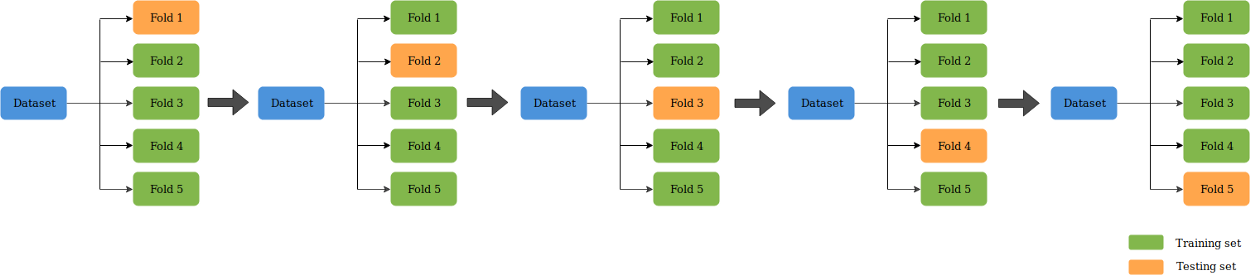

In [48]:
def preprocessing(data):

    mms=StandardScaler()
    df=pd.DataFrame(mms.fit_transform(data))
    
    df.columns=data.columns
    df=df.set_index(data.index)
    cols = list(data.columns)    
    cols = [col for col in df if col != 'Returns']
    
    #df = df.iloc[:,4:20]
    #df = df.drop(['Volume'], axis = 1)
    X = df.iloc[:, df.columns != 'Returns']
    y = df.iloc[:, df.columns == 'Returns']
    y_class = np.where(y>=0,1,-1)
    return X,y,y_class

In [49]:
def Performace_measure_C(y_test,y_pred,symbol, model):
    #cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    #print("Confusion Matrix for: "+str(symbol),model, cnf_matrix)
    score = metrics.accuracy_score(y_test, y_pred)
    #print("Accuracy for "+str(symbol),model," is: ",score)
    return score

In [50]:
def Logistics_C(X_train,X_test,y_train,y_test,i):
    lm = linear_model.LogisticRegression(solver = 'lbfgs')
    lm.fit(X_train,np.ravel(y_train,order='C'))
    y_pred = lm.predict(X_test)
    model = 'Logistics'
    score = Performace_measure_C(y_test,y_pred,i, model)
    return score,model,lm

In [51]:
def penalized_C(X_train,X_test,y_train,y_test,i):
    lm = linear_model.SGDClassifier(loss="log", penalty="l1")
    lm.fit(X_train,np.ravel(y_train,order='C'))
    y_pred = lm.predict(X_test)
    model = 'Penalized'
    score = Performace_measure_C(y_test,y_pred,i, model)
    return score, model,lm

In [52]:
def SupportVectorMachine_C(X_train,X_test,y_train,y_test,i):
    sm = SVC(kernel='linear')
    sm.fit(X_train,np.ravel(y_train,order='C'))
    y_pred = sm.predict(X_test)
    model = 'SVM'
    score = Performace_measure_C(y_test,y_pred,i, model)
    return score, model,sm

In [53]:
def DecisionTree_C(X_train,X_test,y_train,y_test,i):
    DT = DecisionTreeClassifier()
    DT.fit(X_train,np.ravel(y_train,order='C'))
    y_pred = DT.predict(X_test)
    model = 'Decision Tree'
    score = Performace_measure_C(y_test,y_pred,i, model)
    return score, model,DT

In [54]:
def RandomForest_C(X_train,X_test,y_train,y_test,i):
    RF = RandomForestClassifier(n_estimators= 100)
    RF.fit(X_train,np.ravel(y_train,order='C'))
    y_pred = RF.predict(X_test)
    model = 'Random Forest'
    score = Performace_measure_C(y_test,y_pred,i, model)
    return score, model,RF

In [55]:
def Extra_tree_C(X_train,X_test,y_train,y_test,i):
    EF = ExtraTreesClassifier(n_estimators= 100)
    EF.fit(X_train,np.ravel(y_train,order='C'))
    y_pred = EF.predict(X_test)
    model = 'Extra Tree'
    score = Performace_measure_C(y_test,y_pred,i, model)
    return score, model,EF

In [56]:
def KNN(X_train,X_test,y_train,y_test,i):
    KN = KNeighborsClassifier(n_neighbors= int(np.sqrt(len(X_train))))
    #print(int(np.sqrt(len(X_train))))
    KN.fit(X_train,np.ravel(y_train,order='C'))
    y_pred = KN.predict(X_test)
    model = 'KNN'
    score = Performace_measure_C(y_test,y_pred,i, model)
    return score, model,KN

In [57]:
def bagging_C(X_train,X_test,y_train,y_test,i,lm,sv,dt,rf,et,kn):
    baggingModel = VotingClassifier([('a',lm),('b',sv),('c',dt),('d',rf),('e',et),('f',kn)])
    baggingModel.fit(X_train,np.ravel(y_train,order='C'))
    y_pred = baggingModel.predict(X_test)
    model = 'Bagging'
    score = Performace_measure_C(y_test,y_pred,i, model)
    return score, model,baggingModel

In [58]:
def boosting_C(X_train,X_test,y_train,y_test,i,lm,sv,dt,rf,et,kn):
    boostingModel = AdaBoostClassifier(base_estimator=rf,algorithm='SAMME')
    boostingModel.fit(X_train,np.ravel(y_train,order='C'))
    y_pred = boostingModel.predict(X_test)
    model = 'Boosting'
    score = Performace_measure_C(y_test,y_pred,i, model)
    return score, model,boostingModel

In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
def Classifier():
    X, y, y_class = preprocessing(Dataset)
    X_train, X_test, y_train, y_test = train_test_split(X,y_class, test_size = 0.30, random_state =500)

    score_log, model1,lm = Logistics_C(X_train,X_test,y_train,y_test,i)
    score_pen, model2,pen = penalized_C(X_train,X_test,y_train,y_test,i)
    score_svm, model3,sv = SupportVectorMachine_C(X_train,X_test,y_train,y_test,i)
    score_dt, model4,dt = DecisionTree_C(X_train,X_test,y_train,y_test,i)  
    score_rf, model5,rf = RandomForest_C(X_train,X_test,y_train,y_test,i)
    score_et, model6,et = Extra_tree_C(X_train,X_test,y_train,y_test,i)
    score_kn, model7,kn = KNN(X_train,X_test,y_train,y_test,i)
    score_bg,model8,bg = bagging_C(X_train,X_test,y_train,y_test,i,lm,sv,dt,rf,et,kn)
    score_bs,model9,bs = boosting_C(X_train,X_test,y_train,y_test,i,lm,sv,dt,rf,et,kn)

    lst = {'Model': [model1,model2,model3,model4,model5,model6,model7,model8,model9],
        'Score': [score_log,score_pen,score_svm,score_dt,score_rf,score_et,score_kn,score_bg,score_bs],
           'Object': [lm,pen,sv,dt,rf,et,kn,bg,bs]
        }
    df = pd.DataFrame(lst,columns= ['Model', 'Score', 'Object'])
    df1 = pd.DataFrame([], index= df.index)
    for k in range(0,len(df.Model)):
        df2 = pd.DataFrame([])
        crossvalidation = KFold(n_splits=5, random_state=None, shuffle=False)
        scores = cross_val_score(df.iloc[k,2], X, y_class, scoring="neg_mean_squared_error", cv=crossvalidation, n_jobs=1)
        x =  df.iloc[k,0]
        df2['Model'] = [x]
        y = np.mean(np.abs(scores))
        df2['MSE'] = [y]
        df1 = df2.append(df1, ignore_index=True, sort= False)
    
    df = pd.merge(df, df1, on='Model')
    sns.set_style("whitegrid") 
    sns.boxplot(x = 'Model', y = 'Score', data = df) 
    #df.boxplot(by ='Model', column =['Score'], grid = True)
    df.dropna(inplace = True)    
    del df['Object']
    print(df)
    print("___________________________________________________")    
    print("Max Accuracy Score is shown in below model:")
    Max_score = df['Score'].max()
    p = (df[df['Score'] == df['Score'].max()])
    print(p)
    print("___________________________________________________")    
    print("Min MSE is shown in below model:")
    q = (df[df['MSE'] == df['MSE'].min()])
    print(q)
    #Best_model = min()

           Model     Score       MSE
0      Logistics  0.707219  1.184592
1      Penalized  0.679144  1.367490
2            SVM  0.707219  1.176570
3  Decision Tree  0.647059  1.346684
4  Random Forest  0.719251  1.147687
5     Extra Tree  0.689840  1.181376
6            KNN  0.712567  1.252021
7        Bagging  0.716578  1.160499
8       Boosting  0.699198  1.189412
___________________________________________________
Max Accuracy Score is shown in below model:
           Model     Score       MSE
4  Random Forest  0.719251  1.147687
___________________________________________________
Min MSE is shown in below model:
           Model     Score       MSE
4  Random Forest  0.719251  1.147687


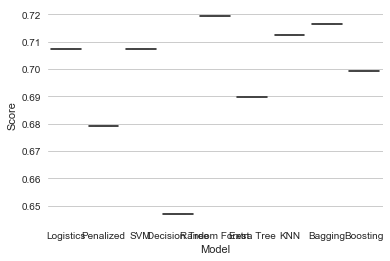

In [61]:
#Will take 2-3 mins to run
for i in Data.Symbol.unique():
    Classifier()


# Deep Neural Network

Artificial Neural Networks (ANN) are computing systems inspired by the biological neural networks. This kind of system can learn by experiencing examples and use the learned experiences to do tasks, which is similar as a human brain. 
A simple illustration of the ANN can be seen here:
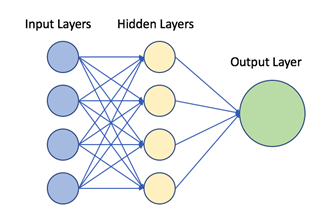


An ANN model consists of an input layer, at least one hidden layer and an output layer, each of which is connected to the other. At least one neuron should be employed in each layer of the ANN model. Input layers on the left part are the parameters
considered to be put into the ANN algorithm. Hidden layers are the layers for the algorithm to assign different weights to each different neuron. The number of neurons in the hidden layer is determined empirically. The neurons of a layer are linked to
the neurons of the neighboring layers with connectivity coeffcients (weights). Using a learning procedure, these weights are adjusted to classify the given input patterns correctly for a given set of input-output pairs. The initial values of these weights are randomly assigned. The back-propagation learning algorithm is used to train the multi-layered feed forward ANN structure in the model. Back-propagation is the process that minimizes the forecast error between predicted output and actual output by adjusting the weights in the hidden layers.

Here I set up Deep Learning Algorithm with Tensorflow.

In [62]:
import tensorflow as tf
from matplotlib import pyplot as plt

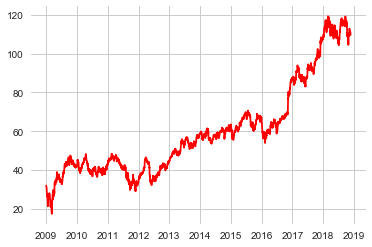

In [63]:
dataset = Dataset
plt.plot(dataset['High'], color="red")
dataset.columns
PERIODICITY = 12 # I hardcoded Periodicity as 12 here.

Make each parameter in same range using Standard Scaler and split data into X and Y

In [64]:
dataset.sort_values("Date", axis=0, inplace=True)
Y = dataset["Returns"]
X = dataset.drop(["Returns"], axis=1)

In [65]:
def Stationary(A):
    newDF = pd.DataFrame()
    for col in A.columns:
        colArray = A.loc[:,col]
        if (colArray<0).any():
            colArray = colArray - min(colArray) + 1
        stat = np.diff(np.log(colArray+0.00000000001))
        newDF[col] = stat
    return newDF
stationaryX = Stationary(X.fillna(0.0001))
stationaryX.fillna(0, inplace=True)

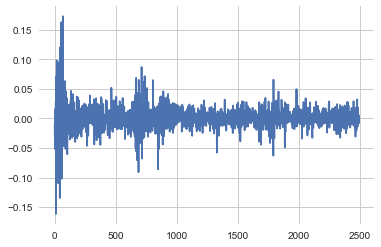

In [66]:
plt.plot(stationaryX['High'])

In [67]:
finalDF = np.zeros((len(stationaryX) - PERIODICITY - 1, PERIODICITY, stationaryX.shape[1]))

In [68]:
for i in range(len(stationaryX) - PERIODICITY - 1):
    for index, col in enumerate(stationaryX.columns):
        finalDF[i, :, index] = stationaryX[col][i:i+PERIODICITY]

In [69]:
finalDF.shape

(2478, 12, 17)

In [70]:
Y = Y[PERIODICITY+2:]
Y = Y.values.reshape((-1, 1))

In [71]:
Y.shape

(2478, 1)

In [72]:
Y.max(), Y.min()

(0.16265052973160032, -0.1978517280340325)

Set up three Hidden Layers in Neural Network with tanh activation.

The tanh function is a sigmoidal (“s”-shaped), but instead outputs values have range (-1, 1). Thus strongly negative inputs to the tanh will map to negative outputs. Additionally, only zero-valued inputs are mapped to near-zero outputs. These properties make the network less likely to get “stuck” during training. Calculating the gradient for the tanh function also uses the quotient rule:

\begin{array}{rcl} g'_{\text{tanh}}(z) &=& \frac{\partial}{\partial z} \frac{\text{sinh}(z)}{\text{cosh}(z)} \\  &=& \frac{\frac{\partial}{\partial z} \text{sinh}(z) \times \text{cosh}(z) - \frac{\partial}{\partial z} \text{cosh}(z) \times \text{sinh}(z)}{\text{cosh}^2(z)} \\  &=& \frac{\text{cosh}^2(z) - \text{sinh}^2(z)}{\text{cosh}^2(z)} \\  &=& 1 - \frac{\text{sinh}^2(z)}{\text{cosh}^2(z)} \\  &=& 1 - \text{tanh}^2(z)\end{array}

Similar to the derivative for the logistic sigmoid, the derivative of \begin{array}{rcl} g_{\text{tanh}}(z) \end{array} is a function of feed-forward activation evaluated at z, namely \begin{array}{rcl}(1-g_{\text{tanh}}(z)^2)\end{array}

Thus the same caching trick can be used for layers that implement tanh activation functions.

In [73]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(PERIODICITY*2, input_shape=(PERIODICITY, stationaryX.shape[1]), return_sequences=True, dropout=0.1, recurrent_dropout=0.1, activation='tanh'))
model.add(tf.keras.layers.LSTM(32, dropout=0.1, recurrent_dropout=0.1, activation='tanh'))
model.add(tf.keras.layers.Dense(16, activation='tanh'))
model.add(tf.keras.layers.Dense(1, activation='tanh'))
model.compile(loss='mse', optimizer='adam')

In [74]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 12, 24)            4032      
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                7296      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 11,873
Trainable params: 11,873
Non-trainable params: 0
_________________________________________________________________
None


- Choice of optimization algorithm 

For deep learning model the choice of optimization algorithm can mean the difference between good results in minutes, hours, and days.
The Adam optimization algorithm is an extension to stochastic gradient descent that has recently seen broader adoption for deep learning applications.

Adam is an optimization algorithm that can used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

The Adam optimization algorithm is an extension to stochastic gradient descent that has recently seen broader adoption for deep learning applications in computer vision and natural language processing.

Adam is different to classical stochastic gradient descent.Stochastic gradient descent maintains a single learning rate (termed alpha) for all weight updates and the learning rate does not change during training.

Here in Adam, learning rate is maintained for each network weight (parameter) and separately adapted as learning unfolds.

The method computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients.
Adam adopt two other extensions of stochastic gradient descent. Specifically:

- Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).
- Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).


This will attain good prediction after a long number of epochs; we have to monitor where loss is declining and become constant at that point we have to stop and get the prediction correctly.
Here I tested with 400 but I think it will still go beyound that.

In [75]:
for i in Data.Symbol.unique():
    X_train, X_test, y_train, y_test = train_test_split(finalDF,Y, test_size = 0.25, random_state =300)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics = ["accuracy"])
    model.fit(X_train, y_train, batch_size=4, validation_split=0.2, epochs=3)
    # Predicting first 20 values (Ypred, Ytrue)
    print("Observation","Prediction")
    #model.evaluate()
    y_pred = model.predict(X_test)
    for j in range(20):
        print(y_test[j],y_pred[j])

Train on 1486 samples, validate on 372 samples
Epoch 1/3
1486/1486 [==============================] - 7s 4ms/step - loss: 4.2241e-04 - acc: 0.0074 - val_loss: 6.2698e-04 - val_acc: 0.0134
Epoch 2/3
1486/1486 [==============================] - 4s 3ms/step - loss: 4.0301e-04 - acc: 0.0074 - val_loss: 5.8233e-04 - val_acc: 0.0134
Epoch 3/3
1486/1486 [==============================] - 4s 3ms/step - loss: 3.9037e-04 - acc: 0.0074 - val_loss: 6.0736e-04 - val_acc: 0.0134
Observation Prediction
[-0.00435577] [-0.00957478]
[-0.01459587] [-0.01298499]
[-0.01131112] [-0.00465428]
[-0.0021814] [-0.0071797]
[-0.03383978] [-0.01054357]
[0.01631994] [-0.00444713]
[-0.01565598] [-0.00987345]
[0.00628431] [-0.0076023]
[-0.03209005] [-0.00354035]
[-0.00402456] [-0.01184954]
[-0.01635224] [-0.0033906]
[-0.01821859] [-0.01196838]
[0.01436502] [-0.01047186]
[0.01114924] [-0.00782855]
[-0.00540855] [-0.01549766]
[0.00627265] [-0.00869203]
[0.02566003] [-0.00499261]
[-0.00782864] [-0.00604428]
[-0.00541599]

# Multinomial Model with Portfolio Optimization
Its a part of Machine Learning Project but here I only showed Black Litermann Mean Variance Optimization. Due to shortage of time I unable to link this to predict returns of portfolio using Machine Learning algo's, if its goes bullish, bearish.

In [76]:
datadir = 'data'
if not os.path.exists(datadir):
    os.mkdir(datadir)
    print("Directory " , datadir ,  " Created ")
else:    
    print("Directory " , datadir ,  " already exists")
filename = 'data/' + 'MktCaps.csv'

import csv   
fields=['symbols','caps']
with open(filename, 'w',newline='') as f:
    writer = csv.writer(f)
    writer.writerow(fields)
        
def write_csv_for_all_symbol():
    def read_jason():
        with open("stockdatainfo.json", 'r') as ticker_list_f:
            ticker_list_str = ticker_list_f.read()
            asset_data_info = json.loads(ticker_list_str)
        return asset_data_info
    asset_data_info = read_jason()
#asset_filename = "assetdata.csv"
    itr = 0 
    tick = asset_data_info["stock_tickers"]
    feature_list = asset_data_info["features_list"]
    length = len(asset_data_info['stock_tickers'])

    for itr in range(0, length):
        ticker = tick[itr]
        newfile = 'data/' + ticker + '.csv'
        data = web.DataReader(ticker, 'yahoo',"2009-01-01", "2019-01-01")[feature_list] 
        data1 = web.get_quote_yahoo(ticker)['marketCap'] 
        data.insert(0,'Symbol',tick[itr])
        data.to_csv(newfile, index = True, header=True)
        data1.to_csv(filename, mode = 'a',encoding='utf-8')
        print (itr, tick[itr],'has data stored to csv file')
        

#write_csv_for_one_symbol('AAPL')
write_csv_for_all_symbol()

Directory  data  Created 
0 AMD has data stored to csv file
1 GOOGL has data stored to csv file
2 JPM has data stored to csv file
3 AMZN has data stored to csv file
4 NFLX has data stored to csv file
5 MSFT has data stored to csv file
6 AAPL has data stored to csv file
7 SLB has data stored to csv file
8 KO has data stored to csv file
9 GS has data stored to csv file


# Black Litterman Model
It starts with the Market Returns, • Apply your own unique views of how certain markets are going to behave

• The end result is a set of return forecasts that give rise to diversified portfolio when used with Mean-Variance Optimization.

• The Market Returns are the returns that are implied by the Market Portfolio. The Market Returns are derived from known information using Reverse Optimization:

Risk Premium
Covariance Matrix
Market Capitalization of the assets

                             Π = λΣwmkt
where, Π (Pi) is the excess market returns over the risk free rate,

λ (Lambda) is the risk aversion coefficient,

Σ (Sigma) is the covariance matrix of returns, and

wmkt is the market capitalization weight of the assets

Risk aversion coefficient (λ)= Risk Premium / Variance

Covariance Matrix(Σ) for two asset A and B, Covariance (A,B) = Correlation (A,B) * Std Dev (A) * Std Dev (B)

Market Portfolio Weights are based on the market capitalization for each of the assets in a portfolio.

Implied Total Market Return is the Excess Return plus the Risk-Free Rate

In [77]:
%pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (12, 8)
from pandas import *
import scipy.optimize
import numpy as np
import re

from datetime import datetime  
filename = 'data/' + 'MktCaps.csv' 
    
def load_mkt_caps(file):
    symbols_caps = pandas.read_csv(file, index_col = None) # symbols_caps is a pandas.dataframe
    symbols_caps.dropna(how = "all", inplace = True)
    symbols = list(symbols_caps['symbols'])
    caps = list(symbols_caps['caps'])
    return symbols, caps

# Function takes in user input and returns a list of stock symbols if input is legal and returns [] otherwise
def select_assets(*args):
    pool_symbols, _ = load_mkt_caps(filename)
    try:
        assets = ''.join(args).upper().split(' ')
    except:
        print('\n\nWarning: not pass proper input symbol!\n\n')
        return []
    if set(pool_symbols).union(set(assets)) != set(pool_symbols):
        print('\n\nIimproper input format or stock not in our pool! Please type again!\n\n')
        return []
    else:
        print('\n\nInput passed from stored data!')
        return assets

assets_list = []
while assets_list == []:
    assets_list = input('''-----------------------------------------------------\n Please input minimum two proper Stock names from this list:
    "AMD","GOOGL","JPM","AMZN","NFLX","MSFT","GS","KO","AAPL","SLB"\n
    ''')
    assets_list = select_assets(assets_list) 

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib
-----------------------------------------------------
 Please input minimum two proper Stock names from this list:
    "AMD","GOOGL","JPM","AMZN","NFLX","MSFT","GS","KO","AAPL","SLB"

    AMD GOOGL JPM AMZN NFLX MSFT GS KO SLB AAPL


Input passed from stored data!


In [78]:
def load_data(stk_list):   
    pool_symbols, pool_caps = load_mkt_caps(filename) 
    symbols = list(set(stk_list))
    caps = []
    for s in symbols:
        caps.append(pool_caps[pool_symbols.index(s)])  
    price_arrays = []
    for s in symbols:
        data = pandas.read_csv('data/%s.csv' % s, index_col=None, parse_dates=True) 
        prices = list(data['Close'])
        price_arrays.append(prices) 
    return symbols, caps, price_arrays 

symbols, caps, price_arrays = load_data(assets_list)

In [79]:
def compute_stats(price_arrays):
    #Transfer a list of prices into a matrix
    price_up = numpy.mat(price_arrays)
    #Use our data to compute daily return
    price_row = numpy.size(price_up, 0)
    price_col = numpy.size(price_up, 1)
    data_return = numpy.zeros([price_row, price_col - 1])
    for i in range(price_row):
        for j in range(price_col - 1):
            p_start = price_up[i, j]
            p_end = price_up[i, j + 1]
            data_return[i, j] = (p_end - p_start)/ p_start      
    cal_return = numpy.array([])
    for i in range(price_row):
        mean_return = numpy.mean(data_return[i])
        cal_return = numpy.append(cal_return, mean_return) 
    var_cov_matx = cov(data_return)
    cal_return = (1 + cal_return) ** 250 - 1
    var_cov_matx  = var_cov_matx * 250
    return cal_return, var_cov_matx

In [80]:
#Calculate weight from market caps and Calculate return and var_cov_matrix
W = np.array(caps) / sum(caps)
Rp, Vp= compute_stats(price_arrays)
                        
#Hardcoded 1.5% real risk-free rate.
                        
rf = 0.015

In [81]:
#To compute frontier of portfolio constructed with given assets with return, 
#var-cov matrix and risk free rate hardcoded to 1.5%
def portfolio_frontier(Rp, Vp, rf):
    exp_mean = []
    opt_var = []
    num_of_assets = len(Rp)
    min_ret = min(Rp)
    max_ret = max(Rp)
    group = 20 #Calculate 20 groups of optimal solution
    interval = (max_ret - min_ret)/(group - 1)
    ret_list = []
    for i in range(group):
        ret_list.append((min_ret + interval * i))
    
    #Calculate weights which minimizes variance of portfolio. 
    def optimization(Wp, Rp, Vp, r):
        mean = dot(Wp, Rp)
        var = dot(dot(Wp, Vp), Wp)
        penalty = 100 * abs(mean - r)
        return var + penalty
    
    for r in ret_list:#For different return
        #initial weight for optimization
        Wp = ones(num_of_assets) / num_of_assets
        boundary = [] 
        for i in range(num_of_assets):
            boundary.append((0, 1))
        #The boundary of each weight for a specific asset
        constraint_ = ({'type': 'eq', 'fun': lambda Wp: sum(Wp) - 1.0})
        #The constraints in optimizing that the sum of weights should equal to 1
        result = scipy.optimize.minimize(optimization, Wp, (Rp, Vp, r), method = 'SLSQP',
                                             constraints = constraint_, bounds = boundary)
        
        if result.success:
            exp_mean.append(r)
            opt_var.append(dot(dot(result.x, Vp), result.x))
        else:
            raise BaseException(result.message)
    
    return array(exp_mean), array(opt_var)
                        

In [82]:
#To calculate tangent point from on optimal portfolio and risk-free rate
def weight_MV(Rp, Vp, rf):
    def weight_initial(Rp):                 # initial weight of the optimization procedure
        port_count = len(Rp)
        Wp=[]
        for i in range(port_count):
            Wp.append(1 / port_count)         # set all of these assets with equal weights in the portfolio
        return Wp
    def MV_object_function(Wp, Rp, Vp, rf):    # return the objective function of Mean Variance optimization change 
        p_mean = sum(Rp * Wp)                 #To calculate the mean return of the portfolio
        p_var = dot(dot(Wp , Vp), Wp)          #To calculate the variance of the portfolio
        p_sharp_ratio= (p_mean - rf) / sqrt(p_var)
        object_func =  1 / p_sharp_ratio
        return object_func
    def MV_optimal(Rp, Vp, rf):
        Wp = weight_initial(Rp)              # input the initial weight
        bound = []                           # add each bound of every assets weight in the spread from [0,1]
        for i in range(len(Rp)):
            bound.append((0., 1.))                 
        constraint = ({'type': 'eq', 'fun': lambda Wp: sum(Wp) - 1.}) 
        weight_optimal =scipy.optimize.minimize(MV_object_function, 
                                                Wp,(Rp, Vp, rf), method='SLSQP', constraints=constraint, bounds=bound)
                                             #calculate the optimal weight of each assests in the portfolio in MV model
        if weight_optimal.success:
            return weight_optimal.x
        else:
            raise BaseException(weight_optimal.message)
    return MV_optimal(Rp, Vp, rf)


In [83]:
def equilibrium_excess_return(W,Rp,Vp): # Apply Market Caps Weights
    mean = dot(W,Rp)
    var = dot(dot(W,Vp),W)
    lamuda = (mean - rf)/var
    return dot(dot(lamuda,Vp),W)

Pi = equilibrium_excess_return(W,Rp,Vp)

In [84]:
#Here we are optimizing portfolio using equilibrium excess return.
def optimal_portfolio_based_on_equilibrium_returns(Rp,Vp,rf):
    Wp = weight_MV(Rp,Vp,rf)
    opt_mean = dot(Wp,Rp)
    opt_var = dot(dot(Wp,Vp),Wp)
    frontier_mean,frontier_var = portfolio_frontier(Rp,Vp,rf)
    result_implied_return = dict()
    result_implied_return['Weights']=Wp
    result_implied_return['Tangent_mean']=opt_mean
    result_implied_return['Tangent_var']=opt_var
    result_implied_return['Frontier_mean']=frontier_mean
    result_implied_return['Frontier_var']=frontier_var
    return result_implied_return

result_eq = optimal_portfolio_based_on_equilibrium_returns(Pi+rf,Vp,rf)

In [85]:
def optimization_views(Vp,Pi,rf):
    view = []
    view_link = []
    def pi_add_view(Vp,Pi):  
        scalar = 0.025      # indicating the uncertainty of the CAPM distribution (0.025-0.05) 
        pi_vol = dot(scalar,Vp)    # Uncertinity Matrix                
        view_vol= [] 
        pi_vol_inv = inv(pi_vol)                
        view_vol_inv = [] 
        pi_view_weighted =dot(pi_vol_inv,Pi) 
        pi_new= dot(inv(pi_vol_inv), pi_view_weighted)  
        return pi_new               ##the new equilibrium return           

    # get the optimal allocation weights and efficent frontier from new excess return from above
    pi_new = pi_add_view(Vp,Pi)   
    Wp_new = weight_MV(pi_new+rf,Vp,rf)
    mean_new = sum(Wp_new * (pi_new+rf))
    var_new = dot(dot(Wp_new,Vp),Wp_new)
    mean_frontier, var_frontier = portfolio_frontier(pi_new+rf,Vp,rf)
    
    result= dict()
    result['Pi']=pi_new
    result['Weights']=Wp_new
    result['Tangent_mean']=mean_new
    result['Tangent_var']=var_new
    result['Frontier_mean']=mean_frontier
    result['Frontier_var']=var_frontier
    return result
optimal_views = optimization_views(Vp,Pi,rf)

In [86]:
#draw efficient frontier of given assets
def plot_efficient_frontier(optimal,label=None, color='black'):
    text(optimal['Tangent_var'] ** .5, optimal['Tangent_mean'], '   tangent', verticalalignment='center', color=color)
    scatter(optimal['Tangent_var'] ** .5, optimal['Tangent_mean'], marker='o', color=color), grid(True)
    plot(optimal['Frontier_var'] ** .5, optimal['Frontier_mean'], label=label, color=color), grid(True) 
    
#add nodes of assets and mark labels to each nodes in the graph
def plot_symbol(names, Rp, Vp, color='cyan'):
    scatter([Vp[i, i] ** .5 for i in range(len(Rp))], Rp, marker='x', color=color), grid(True)  
    for i in range(len(Rp)): 
        text(Vp[i, i] ** .5, Rp[i], '  %s' % names[i], verticalalignment='center', color=color) 


In [87]:
def MODEL(optimal_views):
                        
    plot_symbol(symbols,optimal_views['Pi']+rf, Vp, color='blue') # adding risk free rate here while plotting.
    plot_efficient_frontier(optimal_views,label='Adding views', color='red')

    xlabel('variance $\sigma$'), ylabel('mean $\mu$'), legend(), show()
    
    display(pd.DataFrame({'Return': Rp, 'Weight (Blacklitterman opt)': optimal_views['Weights']}, index=symbols).T)

    display(pd.DataFrame({'Blacklitterman Model(SCLALAR=0.025)': [optimal_views['Tangent_mean'],optimal_views['Tangent_var']]}, 
                         index=['Portfolio(add risk_free) Return','Portfolio(add risk_free) Volitality']).T)
    display(pd.DataFrame(Vp, columns=symbols, index=symbols))

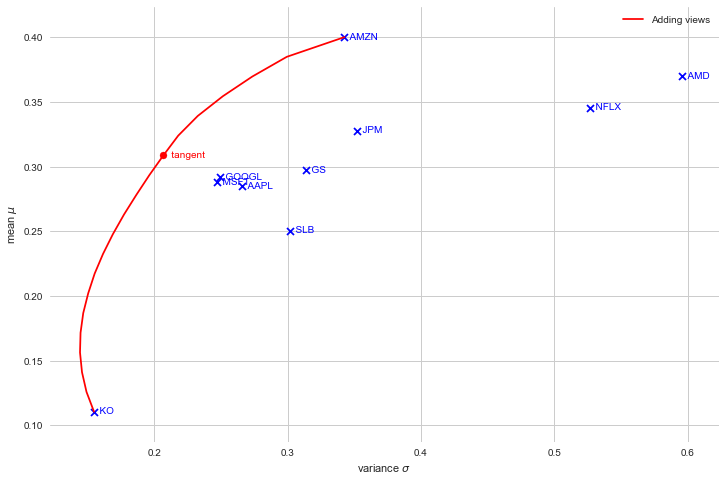

,AAPL,AMD,GOOGL,KO,SLB,NFLX,GS,MSFT,JPM,AMZN
Return,0.335917,0.472587,0.247567,0.089087,0.029892,0.730375,0.124135,0.215131,0.189343,0.481743
Weight (Blacklitterman opt),0.199686,0.007858,0.168897,0.046850,0.011837,0.033932,0.016645,0.225736,0.077972,0.210588


,Portfolio(add risk_free) Return,Portfolio(add risk_free) Volitality
Blacklitterman Model(SCLALAR=0.025),0.308805,0.042817


,AAPL,AMD,GOOGL,KO,SLB,NFLX,GS,MSFT,JPM,AMZN
AAPL,0.070611,0.049363,0.032749,0.011350,0.031508,0.030031,0.035508,0.028708,0.037184,0.035220
AMD,0.049363,0.354601,0.040192,0.020423,0.062552,0.066117,0.063859,0.046382,0.065596,0.055571
GOOGL,0.032749,0.040192,0.062369,0.012858,0.031783,0.039369,0.037819,0.032367,0.039327,0.045753
KO,0.011350,0.020423,0.012858,0.024011,0.017108,0.010644,0.016064,0.014251,0.018899,0.012798
SLB,0.031508,0.062552,0.031783,0.017108,0.090942,0.030520,0.050859,0.030565,0.057179,0.033553
NFLX,0.030031,0.066117,0.039369,0.010644,0.030520,0.277543,0.035760,0.032866,0.031655,0.067784
GS,0.035508,0.063859,0.037819,0.016064,0.050859,0.035760,0.098494,0.035581,0.088962,0.038052
MSFT,0.028708,0.046382,0.032367,0.014251,0.030565,0.032866,0.035581,0.061201,0.039525,0.040839
JPM,0.037184,0.065596,0.039327,0.018899,0.057179,0.031655,0.088962,0.039525,0.124217,0.039351
AMZN,0.035220,0.055571,0.045753,0.012798,0.033553,0.067784,0.038052,0.040839,0.039351,0.117444


In [88]:
MODEL(optimal_views)